In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

We have previously looked at Facebook data, we will review it again here. To answer our question: "are posts that are shared more often receive more likes?"

In [2]:
def load_dataset ():
    num_rows = sum( 1 for line in open( './data/dataset_Facebook.csv' )) - 1
    X = np.zeros((num_rows, 1 ))
    y = np.zeros((num_rows, 1 ))
    with open( './data/dataset_Facebook.csv' ) as f:
        reader = csv.DictReader(f, delimiter= ';' )
        next(reader, None )
        for i, row in enumerate(reader):
            X[i] = int(row[ 'share' ]) if len(row[ 'share' ]) > 0 else 0
            y[i] = int(row[ 'like' ]) if len(row[ 'like' ]) > 0 else 0
    return X, y

We compute the means of our inputs and outputs using a quick numpy function. We can compute the errors in a vectorized fashion as well. In numpy, when we perform addition, subtraction, multiplication, or division of an array by a scalar, numpy will apply that operation to all values in the array. 

For example, when we subtract the scalar mean_x from the vector X, we're actually taking each element of X and subtracting mean_x from it. Same goes for the vector y. 

When we compute the errors, we have to tell numpy to do an element-wise multiplication of the two vectors, not a vector-vector multiplication. (Mathematically, this is called the Hadamard product ). This takes the first element of errors_x and multiplies it by the first element of errors_y and so on to produce a new vector. Then we take the sum of all of the elements in that vector. This produces the numerator of the expression to compute the slope.
To compute the denominator, we can simply take the square of t

In [3]:
class LinearRegression (object):
    #Implements linear regression fit and predict functions
    def __init__ (self):
        self.w = 0
        self.b = 0
        self.rho = 0
    
    # calculate the bias b and the slope w of the best fit
    def fit ( self , X, y):
        mean_x = X.mean()
        mean_y = y.mean()
        errors_x = X - mean_x
        errors_y = y - mean_y
        
        # Hadamard product not a vector-vector multiplication
        errors_product_xy = np.sum(np.multiply(errors_x, errors_y))
        squared_errors_x = np.sum(errors_x ** 2 )
        
        self .w = errors_product_xy / squared_errors_x
        self .b = mean_y - self .w * mean_x
        
        # calculating covariance: measure how 2 variables vary with respect to each other
        N = len(X)
        cov = errors_product_xy / N
        
        # calculating correlation coefficient rho to measure how strong is a relationship between 2 variables
        std_x = X.std()
        std_y = y.std()
        self .rho = cov / (std_x * std_y)
    
    def predict ( self , X):
        # return based on the equation of the best fit line
        return self .w * X + self .b

The correlation coefficient is a value from -1 to 1 that represents two thing: the linearity of our data and the correlation between X and Y. A value close to -1 or 1 means that our data is very linear. A value close to 0 means that our data is not linear at all. If the value is positive, then high values of X tend to produce high values of Y and vice-versa. If the value is negative, high values of X tend to produce low values of Y and vice-versa. This is a very powerful metric

In [4]:
 def visualize_solution (X, y, lin_reg):
        plt.xlabel( 'Number of shares' )
        plt.ylabel( 'Number of likes' )
        plt.scatter(X, y) # explore the data
        x = np.arange( 0 , 800 )
        
        # predicting the targets (linear fit) replace the y
        y = lin_reg.predict(x)
        
        # plot -- in red with laber r=
        plt.plot(x, y, 'r--' , label= 'r = %.2f' % lin_reg.rho)
        plt.legend()
        plt.show()

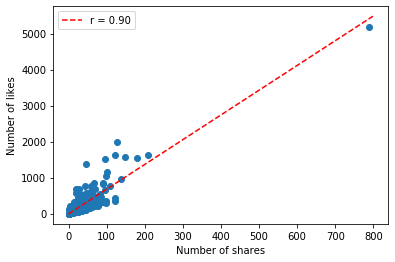

In [5]:
X, y = load_dataset()
lin_reg = LinearRegression()
lin_reg.fit(X, y)
visualize_solution(X, y, lin_reg)   

We notice that our data has a correlation coefficient of +0.9, which is close to 1 and positive. This means our data is really linear and the more shares a post gets, the more likes it tends to get too ! We've answered our question!

To summarize, we learned how to answer a data science question using linear regression, which gives us the line-of-best-fit for our data. We use a cost function to mathematically represent what the "best" line is, and we can use optimization to directly solve for the slope and intercept of the line. However, this equation might not be enough. Additionally,
we can compute the correlation coefficient to tell us the linearity of our data and the correlation between the inputs and outputs.
Linear regression is a fundamental machine learning algorithm and essential to data science!


Exercise:
There are many more columns to this data set, and I encourage you to explore all of them using scatter plots, histograms, etc. 
Try to find hidden correlations! (But remember that correlation does not imply causation!)

Use pandas dataframe to read the facebook csv file, explore the columns available, 
calculate the correlation between the total reach and the total impressions

In [14]:
# Your Code here
data=pd.read_csv('./data/dataset_Facebook.csv',delimiter=';')
data

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


In [15]:
print(data['Lifetime Post Total Reach'].corr(data['Lifetime Post Total Impressions']))

0.6949263153309506


In [ ]:
import seaborn as sns
sns.regplote()

In [37]:
columns=data.iloc[:,3:15]

correlations = [data['Total Interactions'].corr(columns[f]) for f in columns]
correlations


[0.018362118751420936,
 -0.0810489983180351,
 -0.02742061541532274,
 0.10773908810240006,
 0.5385974423980833,
 0.343358124687173,
 0.5721594712521497,
 0.35450152554855385,
 0.2380821957904631,
 0.250083321779349,
 0.6179286945910228,
 0.49257019282490727]